# Problem 1 (Exercise 3.108)
In the code below you can download several sets of noisy data from measurements of elementary single variable functions.


In [1]:
import numpy as np
import pandas as pd
URL1 = 'https://raw.githubusercontent.com/NumericalMethodsSullivan'
URL2 = '/NumericalMethodsSullivan.github.io/master/data/'
URL = URL1+URL2
datasetA = np.array( pd.read_csv(URL+'Exercise3_datafit5.csv') )
datasetB = np.array( pd.read_csv(URL+'Exercise3_datafit6.csv') )
datasetC = np.array( pd.read_csv(URL+'Exercise3_datafit7.csv') )
datasetD = np.array( pd.read_csv(URL+'Exercise3_datafit8.csv') )
datasetE = np.array( pd.read_csv(URL+'Exercise3_datafit9.csv') )
datasetF = np.array( pd.read_csv(URL+'Exercise3_datafit10.csv') )
datasetG = np.array( pd.read_csv(URL+'Exercise3_datafit11.csv') )
datasetH = np.array( pd.read_csv(URL+'Exercise3_datafit12.csv') )

In [20]:
def determinant_2x2(a, b, c, d):
    output = a*d - b*c
    return output

def linear_fit (data):
    n = len(data)
    sum_xi = 0
    sum_xi2 = 0 
    sum_yi = 0 
    sum_xiyi = 0
    for i in range(n):
        sum_xi += data[i][0]
        sum_xi2 += (data[i][0])**2
        sum_yi += data[i][1]
        sum_xiyi += data[i][0] * data[i][1]
    delta = determinant_2x2(n, sum_xi, sum_xi, sum_xi2)
    a0 = determinant_2x2(sum_yi, sum_xi, sum_xiyi, sum_xi2) / delta
    a1 = determinant_2x2(n, sum_yi, sum_xi, sum_xiyi) / delta
    return (a0, a1)

In [21]:
def determinant_3x3(a, b, c, d, e, f, g, h, i):
    part1 = a * determinant_2x2(e, f, h , i)
    part2 = b* determinant_2x2(d , f, g, i)
    part3 = c* determinant_2x2(d, e, g, h)
    output = part1 - part2 + part3
    return output
    
def quadratic_fit(data):
    n = len(data)
    sum_xi = 0
    sum_xi2 = 0 
    sum_xi3 = 0
    sum_xi4 = 0
    sum_yi = 0 
    sum_xiyi = 0
    sum_xi2yi = 0
    for i in range(n):
        sum_xi += data[i][0]
        sum_xi2 += (data[i][0])**2
        sum_xi3 += (data[i][0])**3
        sum_xi4 += (data[i][0])**4
        sum_yi += data[i][1]
        sum_xiyi += data[i][0] * data[i][1]
        sum_xi2yi += data[i][0]**2 * data[i][1]
    delta = determinant_3x3(n, sum_xi, sum_xi2, sum_xi, sum_xi2, sum_xi3, sum_xi2, sum_xi3, sum_xi4)
    delta1 = determinant_3x3(sum_yi, sum_xi, sum_xi2, sum_xiyi, sum_xi2, sum_xi3, sum_xi2yi, sum_xi3, sum_xi4)
    delta2 = determinant_3x3(n, sum_yi, sum_xi2, sum_xi, sum_xiyi, sum_xi3, sum_xi2, sum_xi2yi, sum_xi4)
    delta3 = determinant_3x3(n, sum_xi, sum_yi, sum_xi, sum_xi2, sum_xiyi, sum_xi2, sum_xi3, sum_xi2yi)
    a0 = delta1/delta
    a1 = delta2/delta
    a2 = delta3/delta
    return(a0, a1, a2)

In [90]:
def power_law_fit(data):
    N = len(data)
    sum_log_xi = 0
    sum_log_xi2 = 0
    sum_log_yi = 0
    sum_log_xi_yi = 0
    for i in range(N):
        sum_log_xi += np.log10(data[i][0])
        sum_log_xi2 += (np.log10(data[i][0]))**2
        sum_log_yi += np.log10(data[i][1])
        sum_log_xi_yi += (np.log10(data[i][0]))* (np.log10(data[i][1]))
    delta = determinant_2x2(N, sum_log_xi,sum_log_xi,sum_log_xi2)
    delta1 = determinant_2x2(sum_log_yi, sum_log_xi,sum_log_xi_yi,sum_log_xi2)
    delta2 = determinant_2x2(N, sum_log_yi,sum_log_xi,sum_log_xi_yi)
    a = 10**(delta1/delta)
    n = delta2/delta
    return(a, n)

In [91]:
def exponential_fit(data):
    n = len(data)
    sum_xi = 0
    sum_xi2 = 0 
    sum_log_yi = 0 
    sum_xi_logyi = 0
    for i in range(n):
        sum_xi += data[i][0]
        sum_xi2 += (data[i][0])**2
        if np.log10(data[i][1]) > 0:
            sum_log_yi += np.log10(data[i][1])
            sum_xi_logyi += data[i][0] * np.log10(data[i][1])
    delta = determinant_2x2(n, sum_xi, sum_xi, sum_xi2)
    delta1 = determinant_2x2(sum_log_yi, sum_xi, sum_xi_logyi, sum_xi2)
    delta2 = determinant_2x2(n, sum_log_yi, sum_xi, sum_xi_logyi)
    a = 10**(delta1/delta)
    b = delta2 / (delta*np.log10(np.exp(1)))
    return(a,b)

In [105]:
def periodic_fit(data):
    n = len(data)
    sum_sin_xi = 0
    sum_sin_xi2 = 0
    sum_cos_xi = 0
    sum_cos_xi2 = 0
    sum_sin_cos_xi = 0
    sum_yi = 0
    sum_yi_sin_xi = 0
    sum_yi_cos_xi = 0 
    for i in range(n):
        sum_sin_xi += np.sin(data[i][0])
        sum_sin_xi2 += (np.sin(data[i][0]))**2
        sum_cos_xi += np.cos(data[i][0])
        sum_cos_xi2 += (np.cos(data[i][0]))**2
        sum_sin_cos_xi += (np.cos(data[i][0]))*(np.sin(data[i][0]))
        sum_yi += data[i][1]
        sum_yi_sin_xi += data[i][1]*np.sin(data[i][0])
        sum_yi_cos_xi += data[i][1]*np.cos(data[i][0])
    delta = determinant_3x3(n, sum_sin_xi,sum_cos_xi, sum_sin_xi, sum_sin_xi2, sum_sin_cos_xi, sum_cos_xi, sum_sin_cos_xi, sum_cos_xi2)
    delta1 = determinant_3x3(sum_yi, sum_sin_xi,sum_cos_xi, sum_yi_sin_xi, sum_sin_xi2, sum_sin_cos_xi, sum_yi_cos_xi, sum_sin_cos_xi, sum_cos_xi2)
    delta2 = determinant_3x3(n, sum_yi,sum_cos_xi, sum_sin_xi, sum_yi_sin_xi, sum_sin_cos_xi, sum_cos_xi, sum_yi_cos_xi, sum_cos_xi2)
    delta3 = determinant_3x3(n, sum_sin_xi,sum_yi, sum_sin_xi, sum_sin_xi2, sum_yi_sin_xi, sum_cos_xi, sum_sin_cos_xi, sum_yi_cos_xi)
    a0 = delta1/delta
    a1 = delta2/delta
    a2 = delta3/delta
    return(a0, a1, a2)

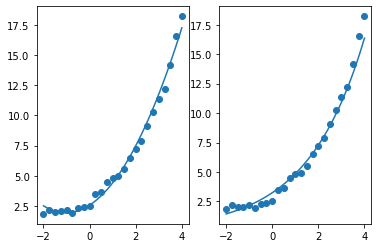

In [94]:
# DATASET A #1
a0 = quadratic_fit(datasetA)[0]
a1 = quadratic_fit(datasetA)[1]
a2 = quadratic_fit(datasetA)[2]
# plot the points and the best fit line
x = np.linspace(-2,4)
y = a0 + a1 *x + a2 * x**2
plt.subplot(1,2,1)
plt.plot(x, y)
x_data = [x[0] for x in datasetA]
y_data = [y[1] for y in datasetA]
plt.scatter(x_data, y_data)

# DATASET A #2
a = exponential_fit(datasetA)[0]
b = exponential_fit(datasetA)[1]
x = np.linspace(-2,4)
y = a * np.exp(b*x)
plt.subplot(1, 2, 2)
plt.plot(x, y)
x_data = [x[0] for x in datasetA]
y_data = [y[1] for y in datasetA]
plt.scatter(x_data, y_data)

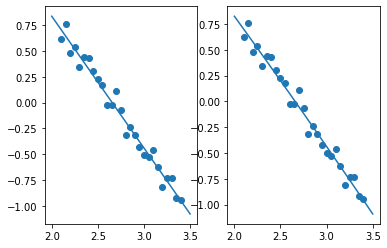

In [95]:
# DATASET B #1
a0 = linear_fit(datasetB)[0]
a1 = linear_fit(datasetB)[1]
# plot the points and the best fit line
x = np.linspace(2,3.5)
y = a0 + a1 * x
plt.subplot(1,2,1)
plt.plot(x, y)
x_data = [x[0] for x in datasetB]
y_data = [y[1] for y in datasetB]
plt.scatter(x_data, y_data)

# DATASET B #2
a0 = quadratic_fit(datasetB)[0]
a1 = quadratic_fit(datasetB)[1]
a2 = quadratic_fit(datasetB)[2]
# plot the points and the best fit line
x = np.linspace(2,3.5)
y = a0 + a1 *x + a2 * x**2
plt.subplot(1,2,2)
plt.plot(x, y)
x_data = [x[0] for x in datasetB]
y_data = [y[1] for y in datasetB]
plt.scatter(x_data, y_data)

/var/folders/sx/gw6n5mnj28x21kcmksnp_p240000gn/T/ipykernel_9662/3719425236.py:10: RuntimeWarning: invalid value encountered in log10
  if np.log10(data[i][1]) > 0:


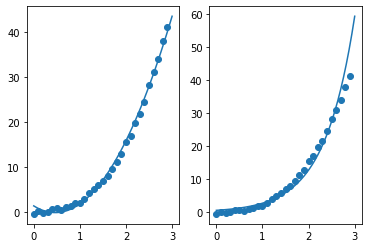

In [97]:
# DATASET C #1
a0 = quadratic_fit(datasetC)[0]
a1 = quadratic_fit(datasetC)[1]
a2 = quadratic_fit(datasetC)[2]
# plot the points and the best fit line
x = np.linspace(0,3)
y = a0 + a1 *x + a2 * x**2
plt.subplot(1,2,1)
plt.plot(x, y)
x_data = [x[0] for x in datasetC]
y_data = [y[1] for y in datasetC]
plt.scatter(x_data, y_data)

# DATASET C #2
a = exponential_fit(datasetC)[0]
b = exponential_fit(datasetC)[1]
x = np.linspace(0,3)
y = a * np.exp(b*x)
plt.subplot(1,2,2)
plt.plot(x, y)
x_data = [x[0] for x in datasetC]
y_data = [y[1] for y in datasetC]
plt.scatter(x_data, y_data)

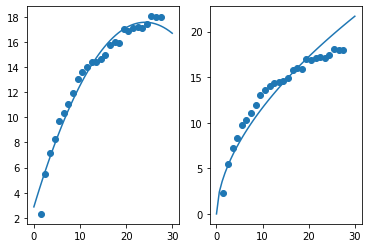

In [99]:
# DATASET D #1
a0 = quadratic_fit(datasetD)[0]
a1 = quadratic_fit(datasetD)[1]
a2 = quadratic_fit(datasetD)[2]
# plot the points and the best fit line
x = np.linspace(0,30)
y = a0 + a1 *x + a2 * x**2
plt.subplot(1,2,1)
plt.plot(x, y)
x_data = [x[0] for x in datasetD]
y_data = [y[1] for y in datasetD]
plt.scatter(x_data, y_data)

# DATASET D #2
a = power_law_fit(datasetD)[0]
n = power_law_fit(datasetD)[1]
x  = np.linspace(0,30)
y = a * x**n
plt.subplot(1,2,2)
plt.plot(x,y)
x_data = [x[0] for x in datasetD]
y_data = [y[1] for y in datasetD]
plt.scatter(x_data, y_data)

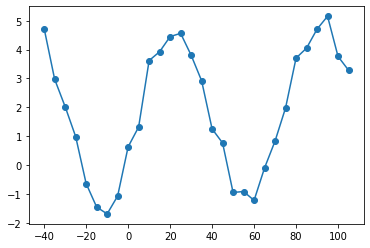

In [84]:
# periodic, power law 
x_data = [x[0] for x in datasetE]
y_data = [y[1] for y in datasetE]
plt.plot(x_data, y_data)
plt.scatter(x_data, y_data)

1.912613260988983 -0.03306341674771936 -0.05493685000612048


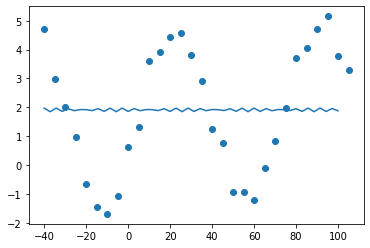

In [107]:
# DATASET E #1
a0 = periodic_fit(datasetE)[0]
a1 = periodic_fit(datasetE)[1]
a2 = periodic_fit(datasetE)[2]
print(a0, a1, a2)
x  = np.linspace(-40,100)
y = a0 + a1 * np.sin(x) + a2 * np.cos(x)
plt.plot(x,y)
x_data = [x[0] for x in datasetE]
y_data = [y[1] for y in datasetE]
plt.scatter(x_data, y_data)

1.4438871934303708 0.11468949739291626


/var/folders/sx/gw6n5mnj28x21kcmksnp_p240000gn/T/ipykernel_9662/568767006.py:6: RuntimeWarning: invalid value encountered in power
  y = a * x**n


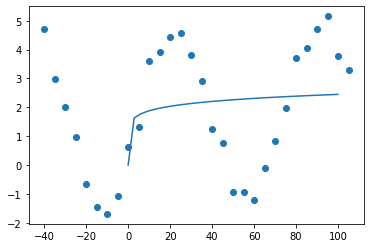

In [89]:
# DATASET E #1
a = power_law_fit(datasetE)[0]
n = power_law_fit(datasetE)[1]
print(a, n)
x  = np.linspace(-40,100)
y = a * x**n
plt.plot(x,y)
x_data = [x[0] for x in datasetE]
y_data = [y[1] for y in datasetE]
plt.scatter(x_data, y_data)

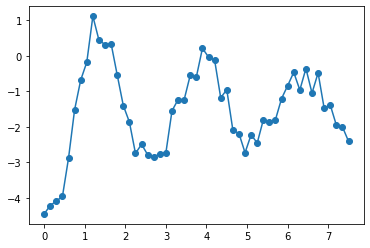

In [9]:
# periodic, power law
x_data = [x[0] for x in datasetF]
y_data = [y[1] for y in datasetF]
plt.plot(x_data, y_data)
plt.scatter(x_data, y_data)

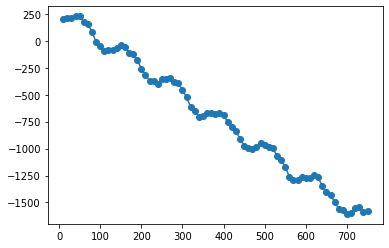

In [10]:
# linear, power law 
x_data = [x[0] for x in datasetG]
y_data = [y[1] for y in datasetG]
plt.plot(x_data, y_data)
plt.scatter(x_data, y_data)

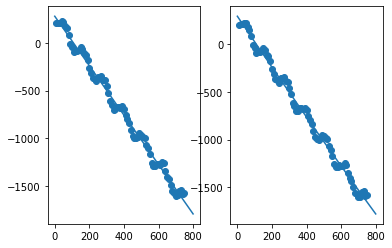

In [104]:
# DATASET G #1
a0 = linear_fit(datasetG)[0]
a1 = linear_fit(datasetG)[1]
# plot the points and the best fit line
x = np.linspace(0,800)
y = a0 + a1 * x
plt.subplot(1,2,1)
plt.plot(x, y)
x_data = [x[0] for x in datasetG]
y_data = [y[1] for y in datasetG]
plt.scatter(x_data, y_data)

# DATASET G #2
a0 = quadratic_fit(datasetG)[0]
a1 = quadratic_fit(datasetG)[1]
a2 = quadratic_fit(datasetG)[2]
# plot the points and the best fit line
x = np.linspace(0,800)
y = a0 + a1 *x + a2 * x**2
plt.subplot(1,2,2)
plt.plot(x, y)
x_data = [x[0] for x in datasetG]
y_data = [y[1] for y in datasetG]
plt.scatter(x_data, y_data)

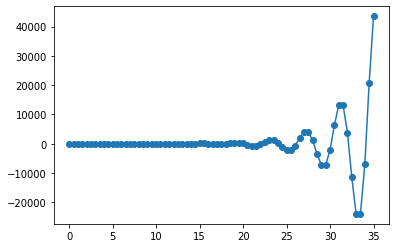

In [11]:
# power law, periodic
x_data = [x[0] for x in datasetH]
y_data = [y[1] for y in datasetH]
plt.plot(x_data, y_data)
plt.scatter(x_data, y_data)

Guess at least two different functions that can fit each data set. Here are some functions that you can try:

* Linear: $a_0 + a_1 * x$
* Quadratic: $a_0 + a_1 *x + a_2 * x^2$
* Power Law: $a * x^n$
* Exponential: $a * e^{(b * x)}$
* Periodic: $a_0 + a_1 * sin(x) + a_2 * cos(x)$

You are not restricted to these functions and you can come up with your own function (say a log function) that you think will best fit the data. You will use the principle of Least Squares to fit each data set to the two functions that you predicted and choose the one function that gives the smallest sum of the residuals squared. Write the full form of the best function that fits the data set with the values of the coefficients of the terms in the function that you determined.

Fill in the following table with the functions you choose to fit each dataset:
| Dataset | Function 1 | Function 2 |
| --- | --- | --- |
| A | $f(x) = $ | $f(x) = $ |
| B | $f(x) = $ | $f(x) = $ |
| C | $f(x) = $ | $f(x) = $ |
| D | $f(x) = $ | $f(x) = $ |
| E | $f(x) = $ | $f(x) = $ |
| F | $f(x) = $ | $f(x) = $ |
| G | $f(x) = $ | $f(x) = $ |
| H | $f(x) = $ | $f(x) = $ |

In [2]:
# Write your code here to estimate the parameters for each function.
# Include plots of each of the functions using plt.subplot, perhaps
# in a 4x2 grid. Be sure to plot the data as well as the 2 functions
# you chose to fit.

# YOUR CODE HERE

# Problem 2

Consider the function $$ f(x) = \sin^2\left({\frac{1}{x \times (2 - x) }}\right) $$

## Plotting

Plot $f(x)$ from $x = 0$ to $x=2$.

/var/folders/sx/gw6n5mnj28x21kcmksnp_p240000gn/T/ipykernel_9662/2759796003.py:1: RuntimeWarning: invalid value encountered in sin
  f = (np.sin(1/(x*(2-x))))**2


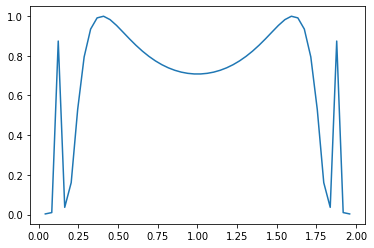

In [111]:
f = (np.sin(1/(x*(2-x))))**2
x = np.linspace(0, 2)
plt.plot(x, f)

# Monte Carlo Estimation

This function is perfectly well behaved in the middle of its range, but it varies infinitely fast at the edges. The entire function fits in a $2 \times 1$ rectangle. The integral should be finite but the traditional methods for determining the integral fail. Use the Monte Carlo method to find the integral of this function using 1,000,000 points. Your integral should be correct to three decimal places.

In [110]:
import random
import scipy.integrate as sp

n = 1000000
f = lambda x: (np.sin(1/(x*(2-x))))**2
upper = 0
for i in np.arange(0, 2, 0.01):
    if f(i) > upper:
        upper = f(i)
count = 0
for j in range(n):
    x_pos = random.uniform(0,2)
    y_pos = random.uniform(0,upper)
    if y_pos <= f(x_pos):
        count += 1
print(count/n * (upper*2))
print(sp.quad(f, 0, 2)[0])

/var/folders/sx/gw6n5mnj28x21kcmksnp_p240000gn/T/ipykernel_9662/4220158756.py:5: RuntimeWarning: invalid value encountered in sin
  f = lambda x: (np.sin(1/(x*(2-x))))**2


1.45167407808431
1.4516877509810684


/var/folders/sx/gw6n5mnj28x21kcmksnp_p240000gn/T/ipykernel_9662/4220158756.py:17: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  print(sp.quad(f, 0, 2)[0])
